# QuTip Introduction

## QuTip Official site and documentation
http://qutip.org/docs/latest/index.html

In [1]:
import qutip as qt
import numpy as np

In [2]:
print(qt.__version__)
print(np.__version__)


4.6.2
1.20.3


## Creating a quantum state

In [3]:
#Data in an iterable object such as an array
data = np.array([1, 0])
data

array([1, 0])

$$\large | 0 \rangle = 
\begin{pmatrix}
1 \\ 0
\end{pmatrix}$$  

In [4]:
ket_0 = qt.Qobj(data)
ket_0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

$$\large | 1 \rangle = 
\begin{pmatrix}
0 \\ 1
\end{pmatrix}$$

In [5]:
ket_1 = qt.fock(2,1)
ket_1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [6]:
#what does the below code generate?
qt.fock(4,3)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]

$$ \large | 0 \rangle^{\dagger} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}^{\dagger} = \begin{pmatrix}
1 & 0
\end{pmatrix}^* = \begin{pmatrix}
1 & 0
\end{pmatrix} = \langle 0 | $$

In [7]:
bra_0 = ket_0.dag()
bra_0

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]

## Density Matrix

$$ \large \rho_0 =  | 0 \rangle \langle 0 | = \begin{pmatrix}
1 \\ 0
\end{pmatrix}\begin{pmatrix}
1 & 0
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}$$

In [8]:
rho_0 = ket_0 * bra_0
rho_0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [9]:
rho_0 = qt.fock_dm(2, 0)
rho_0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

$$\large  \rho_1 = | 1 \rangle \langle 1 |  = \begin{pmatrix}
0 \\ 1
\end{pmatrix}\begin{pmatrix}
0 & 1
\end{pmatrix} = \begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}$$

In [10]:
rho_1 = qt.fock_dm(2,1)
rho_1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

$$ \large  \rho = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} |1 \rangle \langle 1 | = \frac{1}{2} \begin{pmatrix}1 & 0 \\ 0 & 0 \end{pmatrix}  + \frac{1}{2} \begin{pmatrix}0 & 0 \\ 0 & 1 \end{pmatrix}  = \frac{1}{2} \begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix}  $$

In [11]:
0.5 * rho_0 + 0.5 * rho_1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

In [12]:
data = np.array([[0.5, 0], [0, 0.5]])
data

array([[0.5, 0. ],
       [0. , 0.5]])

In [13]:
qt.Qobj(data)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

## Bloch Sphere visualization for Qubits

$$ \large  | 0 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \hspace{1cm}  | 1 \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

In [14]:
ket_0 = qt.fock(2,0)
ket_1 = qt.fock(2, 1)
display(ket_0, ket_1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

$$ \large | + \rangle = \frac{1}{\sqrt 2}(| 0 \rangle + | 1 \rangle) = \frac{1}{\sqrt{2}} \left( \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix}  \right)= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

In [15]:
ket_plus = 1 / np.sqrt(2) * (ket_0  + ket_1)
ket_plus

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

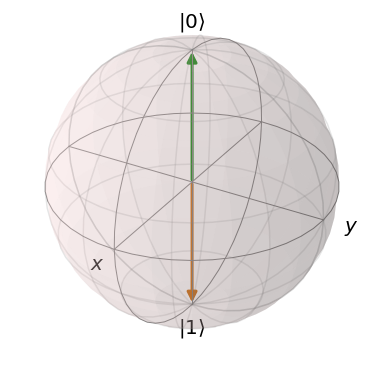

In [16]:
b = qt.Bloch()
b.add_states([ket_0, ket_1])
# b.add_states(ket_plus)
# b.view = [-145, 25]
b.show()

$$ \large \rho = \frac{1}{2}| 0 \rangle \langle 0 | + \frac{1}{2}| + \rangle \langle + | \neq | \psi \rangle \langle \psi |$$

In [17]:
rho_plus = ket_plus * ket_plus.dag()
rho_0 = ket_0 * ket_0.dag()
display(rho_plus, rho_0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [18]:
rho = 0.5 * rho_0 + 0.5 * rho_plus
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.75 0.25]
 [0.25 0.25]]

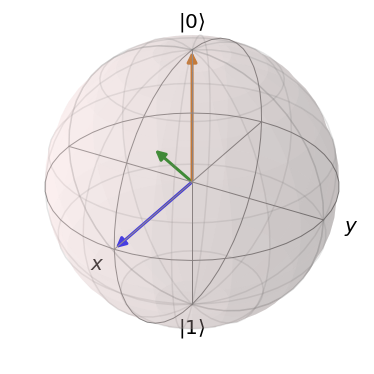

In [19]:
b.clear()
b.add_states(rho)
b.add_states([ket_0, ket_plus])
b.view = [-174, 25]
b.show()

$$ \large \rho = \frac{1}{2}\left( \mathsf{I} + r_x\sigma_x + r_y\sigma_y + r_z \sigma_z \right) \hspace{1cm} \text{Bloch Vector } \vec r = (r_x, r_y, r_z)^T$$

$$ \large \vec r =  (1, 0 , 0)^T \implies \rho = \frac{1}{2} \begin{pmatrix}1 &0 \\ 0 & 1 \end{pmatrix} + \frac{1}{2} \begin{pmatrix}0 &1 \\ 1 & 0 \end{pmatrix}  = \frac{1}{2}\begin{pmatrix}1 &1 \\ 1 & 1 \end{pmatrix} = | + \rangle \langle + |$$

## Creating an operator

$$ \large \sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

In [20]:
pauli_x = np.array([[0,1], [1, 0]])
pauli_x

array([[0, 1],
       [1, 0]])

In [21]:
qt.Qobj(pauli_x)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [22]:
qt.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

$$ \large \sigma_z = \begin{pmatrix} 1 &0 \\ 0 & -1 \end{pmatrix}$$

In [23]:
qt.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

## Operator Addition

$$ \large \sigma_x  + \sigma_z = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} + \begin{pmatrix} 1 &0 \\ 0 & -1 \end{pmatrix} $$

In [24]:
qt.sigmax() + qt.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]

## Operator acting on states.

 $$ \large \sigma_x \left| 0 \right\rangle = \left| 1 \right\rangle  \Longleftrightarrow \begin{pmatrix} 0 &1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

In [25]:
sig_x = qt.sigmax()
sig_x

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [26]:
ket_0 = qt.fock(2,0)
ket_0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [27]:
sig_x * ket_0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

## Tensor products

$$ \large | 0 \rangle \otimes | 1 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \times \begin{pmatrix}  0 \\ 1 \end{pmatrix} \\  0 \times \begin{pmatrix}  0 \\ 1 \end{pmatrix}\end{pmatrix} = \begin{pmatrix}  0 \\ 1 \\ 0 \\ 0 \end{pmatrix}$$

In [28]:
prod = qt.tensor([ket_0, ket_1])
prod

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

$$ \large | \Psi_{AB} \rangle = \frac{1}{\sqrt 2} \left( | 0 \rangle \otimes | 1 \rangle - | 1 \rangle  \otimes | 0 \rangle \right) = \frac{1}{\sqrt 2} \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} - \frac{1}{\sqrt 2} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}  $$

In [29]:
psi_ab = (1 / np.sqrt(2)) * qt.tensor([ket_0, ket_1]) - (1 / np.sqrt(2)) * qt.tensor([ket_1, ket_0])
psi_ab

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

$$ \large Q = \sigma_z \hspace{1cm} S = \frac{-\sigma_z - \sigma_x}{\sqrt 2}$$

$$\large R = \sigma_x \hspace{1cm} T = \frac{\sigma_z - \sigma_x}{\sqrt 2}$$

In [30]:
q = qt.sigmaz()
r = qt.sigmax()
s = (-qt.sigmaz() - qt.sigmax()) / np.sqrt(2)
t = (qt.sigmaz() - qt.sigmax()) / np.sqrt(2)
display(q,r,s,t)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]

$$\large \langle Q \otimes S \rangle  = \langle \Psi | Q \otimes S | \Psi \rangle$$

In [31]:
qs_exp = psi_ab.dag() * qt.tensor([q,s]) * psi_ab
qs_exp

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.70710678]]

$$\large \langle Q \otimes S \rangle + \langle R \otimes S \rangle + \langle R \otimes T \rangle - \langle Q \otimes T \rangle   $$

In [32]:
rs_exp = psi_ab.dag() * qt.tensor([r,s]) * psi_ab
rt_exp = psi_ab.dag() * qt.tensor([r,t]) * psi_ab
qt_exp = psi_ab.dag() * qt.tensor([q,t]) * psi_ab
display(qs_exp + rs_exp + rt_exp - qt_exp) 

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[2.82842712]]

In [33]:
2*np.sqrt(2)

2.8284271247461903

## Partial Trace

$$\large \text{Tr}_B \left( X^A \otimes Y^B \right) = X^A \text{Tr}(Y^B)$$

$$\large \text{Tr}_B \left( \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}^A \otimes  \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}^B \right) = \text{Tr}_B  \begin{pmatrix} a_{11} \times \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix} & a_{12} \times \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix} \\ a_{21} \times \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix} & a_{22} \times \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}\end{pmatrix}^{AB}   = \begin{pmatrix} a_{11}(b_{11} + b_{22}) &  a_{13}(b_{11} + b_{22}) \\a_{21}(b_{11} + b_{22}) & a_{22}(b_{11} + b_{22}) \end{pmatrix}^A $$

$$ \large  \text{Tr}_B \begin{pmatrix} c_{11} &c_{12} &c_{13} &c_{14} \\ 
c_{21} &c_{22} &c_{23} &c_{24}  \\
c_{31} &c_{32} &c_{33} &c_{34} \\
c_{41} &c_{42} &c_{43} &c_{44} \end{pmatrix}^{AB}  = \begin{pmatrix} (c_{11} + c_{22}) & (c_{13} + c_{24}) \\
(c_{31} + c_{42}) & (c_{33} + c_{44})\end{pmatrix}^A $$

In [34]:
psi_dm = psi_ab * psi_ab.dag()
display(psi_ab, psi_dm)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]

$$\large \text{Tr}_A\left( | \Psi \rangle\langle \Psi |_{AB} \right) $$

In [35]:
psi_dm.ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

In [36]:
psi_ab.ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

*Creating a random 4x4 density matrix*

In [37]:
random_density_matrix = qt.rand_dm(4, dims = [[2,2],[2,2]])
random_density_matrix

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.17899205+0.j         -0.12358662+0.13510318j -0.09816054+0.14781835j
  -0.05311284-0.11140515j]
 [-0.12358662-0.13510318j  0.27847095+0.j          0.23344977-0.03843026j
  -0.05044171+0.06060176j]
 [-0.09816054-0.14781835j  0.23344977+0.03843026j  0.40477075+0.j
  -0.0748559 +0.09149547j]
 [-0.05311284+0.11140515j -0.05044171-0.06060176j -0.0748559 -0.09149547j
   0.13776624+0.j        ]]

In [38]:
reduced_rand = random_density_matrix.ptrace(0)
reduced_rand

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.45746301+0.j         -0.14860225+0.20842011j]
 [-0.14860225-0.20842011j  0.54253699+0.j        ]]

### Need to specify dims because partition is not unique

$$ \begin{pmatrix} \cdot & \cdot
\\ 
\cdot & \cdot   \end{pmatrix}_{2 \times 2} \otimes \begin{pmatrix} \cdot & \cdot \\ \cdot & \cdot  \end{pmatrix}_{2 \times 2} \otimes \begin{pmatrix} \cdot & \cdot \\ \cdot & \cdot  \end{pmatrix}_{2 \times 2} = \begin{pmatrix} \cdot & \cdot & \cdot & \cdot &\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot  &\cdot & \cdot & \cdot & \cdot \end{pmatrix}_{8 \times 8}  =  \begin{pmatrix} \cdot & \cdot
\\ 
\cdot & \cdot   \end{pmatrix}_{2 \times 2} \otimes \begin{pmatrix} \cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot \end{pmatrix}_{4 \times 4}$$

## Von Neumann Entropy calculation

$$\large H(\rho) = \text{Tr}(\rho\log_2 \rho)$$

$$\large  H(|\Psi \rangle \langle \Psi |_{AB})$$

In [39]:
psi_dm

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]

In [40]:
qt.entropy.entropy_vn(psi_ab, 2)

3.2034265038149176e-16

$$\large  H(\text{Tr}_A(|\Psi \rangle \langle \Psi |_{AB}) )$$

In [41]:
psi_dm.ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

In [42]:
qt.entropy.entropy_vn(psi_ab.ptrace(0), 2)

1.0

$$ \large H(\rho_{rand}^{AB})$$

In [43]:
random_density_matrix

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.17899205+0.j         -0.12358662+0.13510318j -0.09816054+0.14781835j
  -0.05311284-0.11140515j]
 [-0.12358662-0.13510318j  0.27847095+0.j          0.23344977-0.03843026j
  -0.05044171+0.06060176j]
 [-0.09816054-0.14781835j  0.23344977+0.03843026j  0.40477075+0.j
  -0.0748559 +0.09149547j]
 [-0.05311284+0.11140515j -0.05044171-0.06060176j -0.0748559 -0.09149547j
   0.13776624+0.j        ]]

In [44]:
qt.entropy.entropy_vn(random_density_matrix, 2)

1.0613812745224307

In [45]:
rand_reduced = random_density_matrix.ptrace(0)
rand_reduced

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.45746301+0.j         -0.14860225+0.20842011j]
 [-0.14860225-0.20842011j  0.54253699+0.j        ]]

$$\large  H(\text{Tr}_A(\rho_{rand}^{AB}) )$$

In [46]:
qt.entropy.entropy_vn(rand_reduced, 2)

0.7959004560152803